# **Libraries**

*Set* your local "google_drive_path" that you uploaded the code in it

In [ ]:
Your_google_drive_path="/content/drive/MyDrive/DeepGDPaper"

In [ ]:
from numpy import argmax
import random
import seaborn as sbn
from numpy.random import rand, randn
from scipy.linalg import qr
from numpy import ones
from scipy import stats
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
import  array
import math
from keras.utils import np_utils
from keras.models import Sequential
from sklearn import linear_model
import sklearn
from tabulate import tabulate
from math import sqrt
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.decomposition import PCA as sklearnPCA
import copy
import time
from keras import backend as K
import argparse
import shutil
import warnings
import keras.backend as KeyboardInterrupt
from keras.regularizers import l2
from keras.models import load_model, Model
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
from keras.datasets import mnist, cifar10 , fashion_mnist, cifar100
import sys
from numpy.core.defchararray import array
sys.path.append('..')


!pwd
import os
os.chdir(str(Your_google_drive_path))
!pwd

!pip install pymoo
from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.crossover import Crossover
from pymoo.core.sampling import Sampling

/content
/content/drive/MyDrive/sadl11
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.8/566.8 KB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.6/274.6 KB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 KB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.7 MB/s eta 0:00:00
  Preparing m

## **Dataset and Models**

In [ ]:
############################################## Dataset $ model  ########################################################################
#############################################Function description#######################################################################

#________________________________________________(dataset)___________________________________________________________
#It takes the name of the dataset , and corresponding model from the user then it preprocess the dataset and load the model.
#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset

#Normalization
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

def dataset(arg, model_name):
  CLIP_MIN = -0.5
  CLIP_MAX = 0.5

  if arg=="mnist":
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    # ##Model
    if model_name=="LeNet1":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="LeNet5":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    ##VGG feature extaction (4068)
    ##rank of features (2476)
    #You can use the stored verion or call vgg function to extract features(to do so comment out the second line)
    # MNIST_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/MNIST/block5_conv3_3_3_512.npy")
    _,MNIST_VGG=vgg16_features_GD("mnist")
    features_vgg=MNIST_VGG
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)

  if arg=="Fashion_mnist":
    # load dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("Fashion_mnist")
    if model_name=="LeNet4":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      y_test = np_utils.to_categorical(y_test, 10)
      y_test=np.argmax(y_test, axis=1)  
      y_train = np_utils.to_categorical(y_train, 10)

  
  if arg=="SVHN":
    train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
    test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
    x_train = np.array(train_raw['X'])
    x_test = np.array(test_raw['X'])
    y_train = train_raw['y']
    y_test = test_raw['y']
    x_train = np.moveaxis(x_train, -1, 0)
    x_test = np.moveaxis(x_test, -1, 0)
    x_test= x_test.reshape (-1,32,32,3)
    x_train= x_train.reshape (-1,32,32,3)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("SVHN")
    if model_name=="LeNet5":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      lb = LabelBinarizer()
      y_train = lb.fit_transform(y_train)
      y_test = lb.fit_transform(y_test)
      y_test=np.argmax(y_test, axis=1)

  if arg=="cifar10":
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    if model_name=="12Conv":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="ResNet20":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
  
    #VGG feature extaction (4068)
    #rank of features (3845)
    #You can use the stored verion or call vgg function to extract features (comment out the second line)
    # Cifar_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/Cifar10/x_cifar_inputshape48_block5_conv3.npy")
    _,Cifar_VGG=vgg16_features_GD("cifar10")
    features_vgg=Cifar_VGG
    
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)
  
  x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
  x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

  return x_train, y_train, x_test, y_test,features_vgg , model


## **Feature Extraction**

In [ ]:
#________________________________________________(vgg16_features_GD)___________________________________________________________
#It needs the name of the dataset , then it extract the features of this datasets by using VGG16 (the internal layer: 'block5_conv3') 
#to have enough number of features for calculating the GD (geometric diversity score)

#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Original Feature Matrix of test inputs of the given dataset (features)
#______________________2- the noramlized version of feature matrix between 0 and 1 (X_scf)


def vgg16_features_GD(arg):

  CLIP_MIN = -0.5
  CLIP_MAX = 0.5
    # lb = LabelBinarizer()
    # train_labels = lb.fit_transform(train_labels)
    # test_labels = lb.fit_transform(test_labels)
  if (arg=="cifar10" or arg=="cifar100" or arg=="SVHN"):
    if(arg=="cifar10"):
      (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    if(arg=="cifar100"):
      (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    if (arg=="SVHN"):
      train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
      test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
      x_train = np.array(train_raw['X'])
      x_test = np.array(test_raw['X'])
      y_train = train_raw['y']
      y_test = test_raw['y']
      x_train = np.moveaxis(x_train, -1, 0)
      x_test = np.moveaxis(x_test, -1, 0)
      # lb = LabelBinarizer()
      # train_labels = lb.fit_transform(train_labels)
      # test_labels = lb.fit_transform(test_labels)

    x_test1= x_test.reshape (-1,32,32,3)

  if (arg =="mnist" or arg=="Fashion_mnist"):
    if (arg=="mnist"):
      (x_train, y_train), (x_test, y_test) = mnist.load_data()
    if(arg=="Fashion_mnist"):
      (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_test1=np.dstack([x_test]*3)
    x_test1= x_test1.reshape(-1,28,28,3)
    #Resize the images 48*48 as required by VGG16

  x_test1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test1])
  
  x_test1 = x_test1.astype("float32")
  x_test1 = (x_test1 / 255.0) - (1.0 - CLIP_MAX)
  input_layer=layers.Input(shape=(48,48,3))
  model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
  model_vgg16.summary()
  base_model = model_vgg16
  # You can select another layer of VGG16 that you want to test.
  name_layer = 'block5_conv3'
  intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(name_layer).output)
  FF = intermediate_layer_model.predict(x_test1)
  features= FF.reshape((len(x_test1),9*512))
  # print("rank of feature matrix", np.linalg.matrix_rank(features))
  nom = (features-features.min(axis=0))*(1-0)
  denom = features.max(axis=0) - features.min(axis=0)
  denom[denom==0] = 1
  X_scf = nom/denom 
  print(X_scf)
  print("rank of feature matrix", np.linalg.matrix_rank(X_scf))
  
  return features, X_scf

## **Fault definition**


In [ ]:

#________________________________________________(FaultFunction)___________________________________________________________
#It takes the name of the dataset , and corresponding model name then it loads the HDBSCAN clustering results of mispredicted inputs (from fault definition file).
#and it returns all necessary inforamtions about clustering, best clustering results after hyperparameter tuneing (index_clustering) and mispredicted inputs

#______________Input: dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist") model_name("LeNet1", "LeNet5","LeNet4","12Conv","ResNet20" ), dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset




def FaultFunction(data_name,model_name):
  i=0
  if model_name=="LeNet1" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/top_clustering_label_2coulmns2.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_testdataset_MNIST_LeNet1.npy") 
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_traindataset_MNIST_LeNet1.npy")
    index_clustering_config=2
  if model_name=="LeNet5" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/all_test_CL_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_testdataset_MNIST.npy",allow_pickle=True)
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_traindataset_MNIST.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/top_clustering_label_2coulmns.npy")
    index_clustering_config=4

  if model_name=="12Conv" and data_name=="cifar10":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_testdatasetcifar.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_traindatasetcifar.npy")
    index_clustering_config=0
  if model_name=="ResNet20" and data_name=="cifar10":
    all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_testdataset_cifRes.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_traindataset_cifRes.npy")
    index_clustering_config=4

  if model_name=="LeNet4" and data_name=="Fashion_mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_testdataset_FMNIST.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_traindataset_FMNIST.npy")
    index_clustering_config=13
  if model_name=="LeNet5" and data_name=="SVHN":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_testdataset_SVHN.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_traindataset_SVHN.npy")
    index_clustering_config=15

  noisy_index=[]
  for i in range(len(mis_ind_test)):
    if clustering_result[index_clustering_config][i]==-1:
      noisy_index.append(mis_ind_test[i])
  sett=list(range(0, len(x_test)))
  index_withoutnoisy=set(sett)-set(noisy_index)
  id_test=index_withoutnoisy

  return clustering_result[index_clustering_config],noisy_index, index_withoutnoisy, mis_ind_test, mis_ind_train

Fault function

In [ ]:


def faults(n_samples, sample, mis_i):
  i=0
  pos=0
  neg=0
  i=0
  cluster_lab=[]
  nn=-1
  for l in sample:
    if l in mis_ind_test:
      neg=neg+1 
      # print("index mis",l)
      ind=list(mis_ind_test).index(l)
      if (Clustering_labels[ind]>-1):
        cluster_lab.append(Clustering_labels[ind])
      if (Clustering_labels[ind]==-1):
        cluster_lab.append(nn)
        print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALLLLLLLLLLLLLLLLLLLLLLLLLLAAAAAAAAAAAAAAAAAARRRRRRRRRRRRRRRRRRRRRRTTTTTTTTTTTT", ind)
        nn=nn-1
    else:
      pos=pos+1

    # i=i+1 
  #Each noisy mispredicted input is an specific fault
  faults_n=len(list(set(cluster_lab)))
  #All noisy mispredicted inputs are considered as one specific fault
 
  cluster_1noisy=copy.deepcopy(cluster_lab)
  for i in range(len(cluster_1noisy)):
   if cluster_1noisy[i] <=-1:
     cluster_1noisy[i]=-1
  faults_1noisy=len(list(set(cluster_1noisy)))
  return faults_n,faults_1noisy, neg

GINI and GD

In [ ]:

############################################################## Gini score  ##############################################################################


def gini_score(Output_probability):
  gini_scores=[]
  for i in range(len(Output_probability)):
    sum=0
    for j in range(len(Output_probability[0])):
      sum= sum + Output_probability[i][j]**2
    gini_scores.append(1-sum)
  return gini_scores


In [ ]:

############################################################## Geometric diversity ##############################################################

def GD(IDs, features):
  
  x_sample = np.zeros((len(IDs),len(list(features[0]))))
  conv_output=np.array(features)
  i=0
  for L in IDs :
    x_sample[i]=conv_output[L]
    i=i+1
  dot_p=np.dot(x_sample,x_sample.T)
  sign, Log_det=np.linalg.slogdet(dot_p)
  # Det=np.linalg.det(dot_p)
  # print("Det1", np.linalg.det(dot_p))
  # print("shape", dot_p.shape)

  return Log_det



#**Main (Call Functions)**

In [ ]:
# from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [ ]:
############################################################## Call_functions  ##########################################

data_name=input("Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : ")
model_name=input("Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : ")
x_train, y_train, x_test, y_test, features, model= dataset(data_name, model_name)
print(data_name, model_name)
model.summary()
print("x_test.shape", x_test.shape)
Clustering_labels, noisy_index , index_withoutnoisy, mis_ind_test, mis_ind_train= FaultFunction(data_name, model_name)
Clustering_labels=Clustering_labels[:len(mis_ind_test)]

Output_probability=model.predict(x_test)
Gini_scores=gini_score(Output_probability)

Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : SVHN
Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : LeNet5
58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     

In [ ]:

CLIP_MAX=0.5
test_raw = loadmat(str(Your_google_drive_path)+"/Data/test_32x32.mat')
x_t = np.array(test_raw['X'])
x_t = np.moveaxis(x_t, -1, 0)
x_t= x_t.reshape (-1,32,32,3)
x_t = x_t.astype("float32")
# x_t = (x_t / 255.0) - (1.0 - CLIP_MAX)

26032


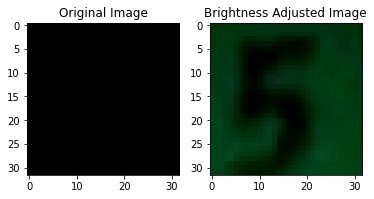

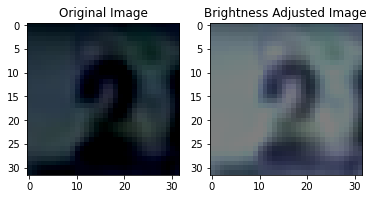

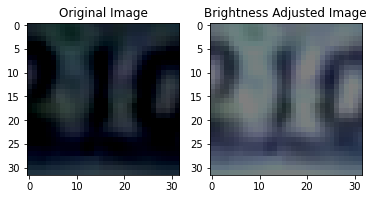

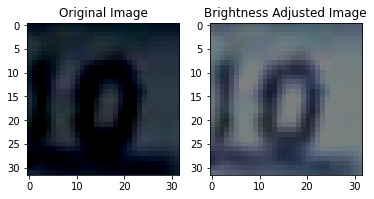

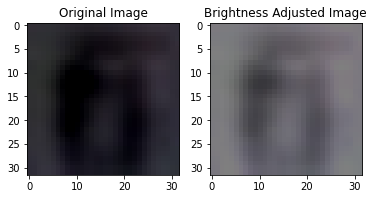

In [ ]:
import cv2
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from matplotlib import pyplot
class BlurFilter:
    def __init__(self, kernel_size=(5, 5)):
        self.kernel_size = kernel_size

    def apply(self, dataset):
        blurred_images = []
        for i in range(dataset.shape[0]):
            image = dataset[i, :,:,:]
            blurred_image = cv2.blur(image, self.kernel_size)
            blurred_images.append(blurred_image)
        return np.array(blurred_images)


class BrightnessFilter:
    def __init__(self, brightness_value=0.3):
        self.brightness_value = brightness_value

    def apply(self, dataset):
        filtered_images = []
        print(dataset.shape[0])
        for i in range(dataset.shape[0]):
            image = dataset[i,:,:,:]
            filtered_image = np.zeros(image.shape, image.dtype)
            filtered_image[:,:,0] = image[:,:,0] + self.brightness_value*255
            filtered_image[:,:,1] = image[:,:,1] + self.brightness_value*255
            filtered_image[:,:,2] = image[:,:,2] + self.brightness_value*255
            filtered_image = np.clip(filtered_image, 0, 255)
            # print("LLL",filtered_image.shape )
            filtered_images.append(filtered_image)
            # print("KK", np.array(filtered_images).shape)
        return np.array(filtered_images)

# Create an instance of the BrightnessFilter class
brightness_filter = BrightnessFilter()

# Apply the brightness filter to the dataset
brightness_images = brightness_filter.apply(x_t)
nn=(brightness_images / 255.0) - (1.0 - CLIP_MAX)
# Display the original and filtered images
for i in range(5):
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(x_test[i])
  plt.title("Original Image")
  plt.subplot(1, 2, 2)
  plt.imshow(nn[i])
  plt.title("Brightness Adjusted Image")
  plt.show()



In [ ]:
shear_factor_x = 0.1
shear_factor_y = 0.1

# Get the shearing matrix
M = np.float32([[1, shear_factor_x, 0], [shear_factor_y, 1, 0]])

# Initialize an empty list to store the output images
sheer = []

# Apply the shearing filter to each image
for i in range(x_t.shape[0]):
    img = x_t[i]
    output_im = cv2.warpAffine(img, M, (32, 32))
    sheer.append(output_im)

# Convert the output images list to a numpy array
sheer = np.array(sheer)


In [ ]:
# Get the rotation matrix
center = (5, 5)
M = cv2.getRotationMatrix2D(center, 10, 1.0)

# Initialize an empty list to store the output images
ROT = []

# Apply the rotation filter to each image
for i in range(x_t.shape[0]):
    img = x_t[i]
    output_img = cv2.warpAffine(img, M, (32, 32))
    ROT.append(output_img)

# Convert the output images list to a numpy array
ROT = np.array(ROT)





In [ ]:
#  Get the rotation matrix
center = (6, 6)
M = cv2.getRotationMatrix2D(center, 15, 1.0)

# Initialize an empty list to store the output images
RT = []

# Apply the rotation filter to each image
for i in range(x_t.shape[0]):
    img = x_t[i]
    output_img = cv2.warpAffine(img, M, (32, 32))
    RT.append(output_img)

# Convert the output images list to a numpy array
RT = np.array(RT)



In [ ]:
shift_factor_x = 0.2
shift_factor_y = 0.2

# Get the shift matrix
M = np.float32([[1, 0, shift_factor_x], [0, 1, shift_factor_y]])

# Initialize an empty list to store the output images
shift = []

# Apply the shift filter to each image
for i in range(brightness_images.shape[0]):
    img = brightness_images[i]
    output_img = cv2.warpAffine(img, M, (32, 32))
    shift.append(output_img)

# Convert the output images list to a numpy array
shift = np.array(shift)

In [ ]:
blur_filter = BlurFilter()

# # Apply the blur filter to the dataset
blurred_images = blur_filter.apply(x_t)

In [ ]:
BR_x2 = brightness_images.astype("float32")
BR_x2 = (BR_x2/255. ) - (1.0 - 0.5)
RT_x2 = ROT.astype("float32")
RT_x2 = (RT_x2/255. ) - (1.0 - 0.5)
BL_x2 = blurred_images.astype("float32")
BL_x2 = (BL_x2/255. ) - (1.0 - 0.5)
SF_x2 = shift.astype("float32")
SF_x2 = (SF_x2/255. )- (1.0 - 0.5)
SR_x2 = sheer.astype("float32")
SR_x2 = (SR_x2/255.) - (1.0 - 0.5)
RT_x3 = RT.astype("float32")
RT_x3 = (RT_x3/255. ) - (1.0 - 0.5)

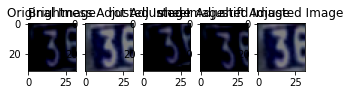

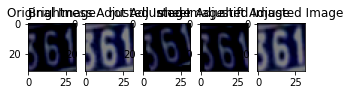

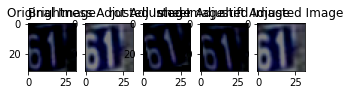

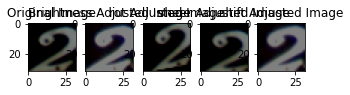

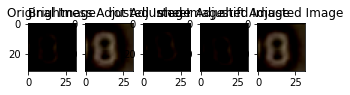

In [ ]:
for i in [800, 801, 802, 803, 807]:
  plt.figure()
  plt.subplot(1, 6, 1)
  plt.imshow(x_test[i])
  plt.title("Original Image")
  plt.subplot(1, 6, 2)
  plt.imshow(BR_x2[i])
  plt.title("Brightness Adjusted Image")
  plt.subplot(1, 6, 3)
  plt.imshow(RT_x2[i])
  plt.title("rot Adjusted Image")
  plt.subplot(1, 6, 4)
  plt.imshow(SR_x2[i])
  plt.title("sheer Adjusted Image")
  plt.subplot(1, 6, 5)
  plt.imshow(SF_x2[i])
  plt.title("shift Adjusted Image")
  plt.subplot(1, 6, 6)
  plt.imshow(BL_x2[i])
  plt.title("Blur Adjusted Image")
  plt.show()